In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
def stochastic_gradient_descent(x, y, nb_it, alpha): 
    n,d= x.shape
    w = np.random.rand(d)
    #print(w)
    for iter in range(nb_it) :
        i = np.random.randint(n)
        y_pred = np.dot(x[i],w)
        error =  y_pred - y[i]
        w =  w - 2*alpha*(1/n)*error*x[i]
        #print(w)
    return w

# Question 2

In [3]:
n = 100
d = 2
x = np.random.rand(n,d)*20
w_ref = np.array([1,-1])
dot = np.dot(x, w_ref)
y = np.array([1 if i > 0 else 0 for i in dot])
nb_it = 1000

In [4]:
w_abs_ref = np.linspace(0, 20, 100)
w_ord_ref = -(w_ref[0] / w_ref[1]) * w_abs_ref

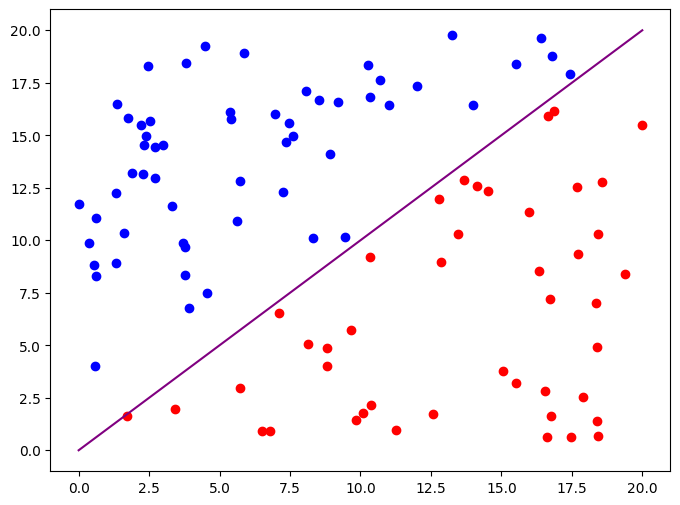

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', label='y = 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', label='y = 1')
plt.plot(w_abs_ref,w_ord_ref, color='purple')


# Question 3

In [6]:
w = stochastic_gradient_descent(x, y, nb_it, 0.001)

In [7]:
print(w)

[ 0.09843151 -0.03698031]


(0.0, 20.0)

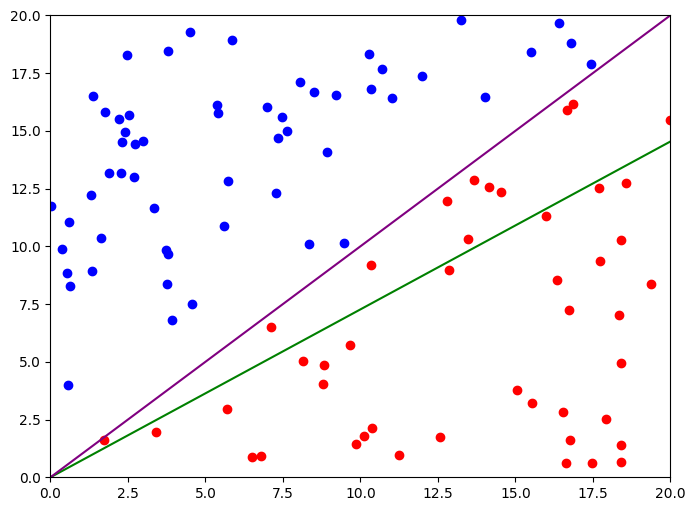

In [8]:
w_abs_bar = np.linspace(0, 40, 100)
coeff = abs(w[0] / w[1])
w_ord_bar = coeff/(1+coeff)* w_abs_bar
plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', label='y = 0')
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', label='y = 1')
plt.plot(w_abs_bar,w_ord_bar, color='green')
plt.plot(w_abs_ref,w_ord_ref, color='purple')
plt.xlim((0,20))
plt.ylim((0,20))

Notre 𝑤 calculé avec la descente de gradient stochastique (SGD) ne parvient pas à bien séparer nos données, mais il est assez précis. Le problème est qu'il dépend fortement de l'initialisation de 𝑤, qui est effectuée de manière aléatoire.

# Question 4

In [9]:
noise = np.random.normal(loc=0.0, scale=2, size=(100,2))
print(noise)
x_noise = x+noise

[[ 2.72096993  2.82377951]
 [ 1.31487913  0.62172056]
 [ 0.58311758  1.35425608]
 [ 2.40787314  0.36894956]
 [-2.1694296   0.72622506]
 [-2.5137411  -1.14237872]
 [ 2.45092308 -1.49487461]
 [ 0.51909686  2.27076919]
 [ 2.73612068 -1.21514692]
 [-0.19685433  0.60413347]
 [-0.96856542  1.43207145]
 [-2.75947318 -3.00469733]
 [-3.6942911   3.04751951]
 [ 1.9741647   3.46504071]
 [ 1.16329441 -0.11445523]
 [ 0.25730355  0.26680023]
 [-1.1394799  -2.15877036]
 [-0.94176392 -1.50034749]
 [-1.87130581  1.00933747]
 [-0.24534795 -0.21055926]
 [-3.51416459 -2.92520353]
 [ 0.63305952  4.46811473]
 [ 0.96624427  2.23766017]
 [ 0.01527447 -0.80924724]
 [-2.58720963  3.1296611 ]
 [ 0.91158987 -3.03669057]
 [ 0.79224712  2.01728755]
 [ 1.75327755 -2.20821314]
 [-1.81176163  0.32835731]
 [ 2.29453179 -4.29494219]
 [-0.76397736 -1.26723548]
 [-0.32871767  0.23408285]
 [-0.95648852  0.43483426]
 [ 0.98486866 -3.94894744]
 [-1.4689357   1.19503873]
 [-0.46930457  0.71583635]
 [ 2.02514869  1.02059125]
 

In [10]:
w_noise = stochastic_gradient_descent(x_noise, y, nb_it, 0.01)

In [11]:
w_noise

array([ 0.06061702, -0.01768344])

(0.0, 20.0)

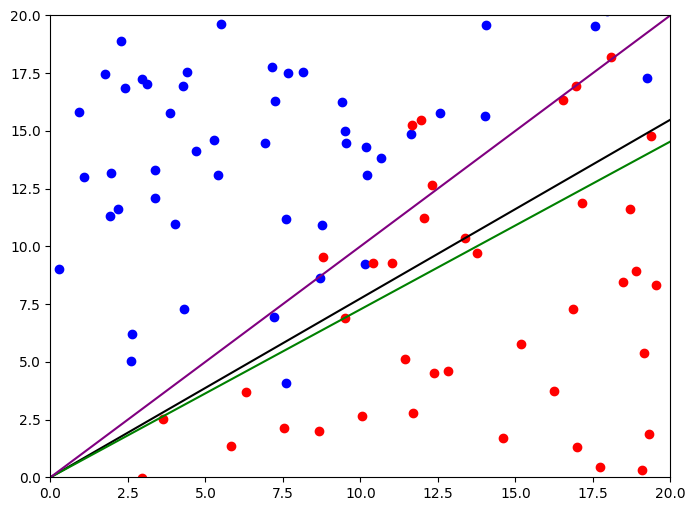

In [12]:
w_abs_noise = np.linspace(0, 40, 100)
coeff = abs(w_noise[0] / w_noise[1])
w_ord_noise = coeff/(1+coeff)* w_abs_noise
plt.figure(figsize=(8, 6))
plt.scatter(x_noise[y == 0, 0], x_noise[y == 0, 1], color='blue', label='y = 0')
plt.scatter(x_noise[y == 1, 0], x_noise[y == 1, 1], color='red', label='y = 1')
plt.plot(w_abs_noise,w_ord_noise, color='black')
plt.plot(w_abs_bar,w_ord_bar, color='green')
plt.plot(w_abs_ref,w_ord_ref, color='purple')
plt.xlim((0,20))
plt.ylim((0,20))

Our SGD algorithm still performs quite well even with noise.

# Question 5

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('wdbc.data', delimiter=',')
#print(df)
x_breast = np.array(df.iloc[:,2:])
print(x_breast.shape)
labels = df.iloc[:,1]
labels = np.array(labels.apply(lambda x: 1 if x == 'M' else 0))
print(labels.shape)

(568, 30)
(568,)


In [17]:
w_breast = stochastic_gradient_descent(x_breast, labels, nb_it, 0.001)

In [18]:
w_breast

array([-4.43032657e+250, -1.05534959e+251, -2.82796695e+251,
       -1.50531983e+252, -4.89809183e+248, -4.15527363e+248,
       -2.78605907e+248, -1.18554111e+248, -9.74509037e+248,
       -2.61396516e+248, -3.51183647e+249, -1.18441549e+250,
       -2.83467785e+250, -2.92952925e+251, -6.05793789e+247,
       -1.20992784e+248, -2.88619679e+248, -6.37225278e+247,
       -2.41918919e+248, -2.95479094e+247, -4.77588828e+250,
       -1.34610242e+251, -3.22515129e+251, -1.94084364e+252,
       -5.37335242e+248, -7.22901215e+247, -4.91064510e+248,
       -1.10126733e+248, -1.59691753e+249, -2.21213864e+248])

In [19]:
def accuracy(x, y, w):
    n, d = x.shape
    acc = 0
    for i in range(n): 
        sign_dot = np.sign(np.dot(x[i], w))
        if np.clip(sign_dot, 0, 1) == y[i]: 
            acc+=1
    return acc/n

In [20]:
accuracy(x_breast, labels, w_breast)

0.6285211267605634

Notre algorithme SGD atteint une précision de 63 %. C'est bien, mais clairement pas suffisant pour séparer efficacement notre ensemble de données. Comme je l'ai mentionné précédemment, cela dépend fortement de l'initialisation de w.